In [ ]:
!pip install seaborn

In [172]:
!pip install japanize-matplotlib

In [173]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from gensim.models.keyedvectors import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import japanize_matplotlib
import seaborn as sns

In [174]:
def show_pca(model, size, t_dict, a_opt):
  model = model

  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  x_pca = pca.fit_transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]
  plt.figure(figsize=(14,10))
  # plt.xlim(xs.min(), xs.max()) 
  # plt.ylim(-2, 4)

  plt.scatter(xs,ys,marker='x',c='b')

  # for i, v in enumerate(word_list_avail):
  #   plt.annotate(v, xy=(xs[i], ys[i]))

  if(a_opt==True):
    for i, word in enumerate(t_dict):
      temp_i = model.vocab[word].index
      plt.scatter(xs[temp_i],ys[temp_i],marker='o',c='r')
      if i%30 == 0:
        plt.annotate(word, xy=(xs[temp_i], ys[temp_i]),fontsize=14)
  else:
    for word in t_dict:
      temp_i = model.vocab[word].index
      plt.scatter(xs[temp_i],ys[temp_i],marker='o',c='r')  
    
  plt.show()
  plt.close()

def show_pca_two_lang(lang1, lang2, size, a_opt):
  t_dict = identical_dict(lang1,lang2,size)
  show_pca(lang1,size,t_dict,a_opt)
  show_pca(lang2,size,t_dict,a_opt)

def show_tsne(model, size, t_dict, a_opt):
  
  model = model

  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]

  tsne = TSNE(n_components = 2, random_state = 0, n_iter = 3000, perplexity = 50)
  x_tsne = tsne.fit_transform(X_show)

  xs = x_tsne[:,0]
  ys = x_tsne[:,1]
  plt.figure(figsize=(14,10))
  # plt.xlim(xs.min(), xs.max()) 
  # plt.ylim(-2, 4)

  plt.scatter(xs,ys,marker='x',c='b')

  # for i, v in enumerate(word_list_avail):
  #   plt.annotate(v, xy=(xs[i], ys[i]))

  if(a_opt==True):
    for i, word in enumerate(t_dict):
      temp_i = model.vocab[word].index
      plt.scatter(xs[temp_i],ys[temp_i],marker='o',c='r')
      if i%20 == 0:
        plt.annotate(word, xy=(xs[temp_i], ys[temp_i]),fontsize=14)
  else:
    for word in t_dict:
      temp_i = model.vocab[word].index
      plt.scatter(xs[temp_i],ys[temp_i],marker='o',c='r')  
    
  plt.show()
  plt.close()

def identical_dict(lang1, lang2,n):
  temp =  [i for i in lang1.index2word[:n] if i in lang2.index2word[:n]]
  temp.remove('</s>')
  print(temp)
  return temp

def show_tsne_two_lang(lang1, lang2, size, a_opt):
  t_dict = identical_dict(lang1,lang2,size)
  show_tsne(lang1,size,t_dict,a_opt)
  show_tsne(lang2,size,t_dict,a_opt)

def identical_dict_exc_num(lang1, lang2,n):
  temp =  [i for i in lang1.index2word[:n] if i in (lang2.index2word[:n]) if i.isnumeric()==False]
  temp.remove('</s>')
  print(temp)
  return temp

def show_tsne_two_lang_exc_num(lang1, lang2, size, a_opt):
  t_dict = identical_dict_exc_num(lang1,lang2,size)
  show_tsne(lang1,size,t_dict,a_opt)
  show_tsne(lang2,size,t_dict,a_opt)

In [152]:
# fastvec_k = KeyedVectors.load_word2vec_format("data/fasttext-vectors/wiki_n.ko.vec", limit=5000)
fastvec_j = KeyedVectors.load_word2vec_format("data/fasttext-vectors/wiki_n.ja.vec", limit=5000)
fastvec_f = KeyedVectors.load_word2vec_format("data/fasttext-vectors/wiki_n.fr.vec", limit=5000)
fastvec_e = KeyedVectors.load_word2vec_format("data/fasttext-vectors/wiki_n.en.vec", limit=5000)


plot pca 2d spaces with en fr ja

In [153]:
#Load en-fr-ja dictionary
dict_3 = pd.read_csv('data/crosslingual/dictionaries/en_fr_ja.txt',sep='\t')
len(dict_3)

lang1 = fastvec_e
lang2 = fastvec_f
lang3 = fastvec_j

In [154]:
def make_df_dict_selected_for_3lang(dict_3,l1,l2,l3,n):
  word_select_list_num = n

  dict_list_for_all_lang = []
  for index, row in dict_3.iterrows():
    try:
      lang1_index = lang1.vocab[row[l1]].index
      lang2_index = lang2.vocab[row[l2]].index
      lang3_index = lang3.vocab[row[l3]].index

      dict_list_for_all_lang.append([index,lang1_index,lang2_index,lang3_index])
    except:
      pass
  df_dict = pd.DataFrame(dict_list_for_all_lang,columns=['index',l1,l2,l3])
  df_dict.set_index('index',inplace=True)
  
  print(len(df_dict))
  word_select_list = [i*10 for i in range(word_select_list_num)]
  return df_dict.iloc[word_select_list,:]


def make_scatter(model, size, lang, df_dict_selected_for_3lang):
  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  x_pca = pca.fit_transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')
#   plt.ylim((ys.min()-0.5,6))
  plt.show()
  return X_show


def make_scatter_2(b_model, model, size, lang, df_dict_selected_for_3lang):
  voca = list(b_model.wv.vocab)
  X = b_model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)


  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]

  x_pca = pca.transform(X_show)
  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')
#   plt.ylim((ys.min()-0.5,6))
  plt.show()
  return X_show

def make_scatter_en(model, size, lang, df_dict_selected_for_3lang, en_model):
  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  x_pca = pca.fit_transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s=word, xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14)

    
  voca = list(en_model.wv.vocab)
  en_x = en_model[voca]
  sz = size
  en_show = X[:sz,:]
  voca_show = voca[:sz]
  
  en_pca = pca.fit_transform(en_show)

  en_xs = en_pca[:,0]
  en_ys = en_pca[:,1]

  en_df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

#   en_df['dict'] = en_df.index.isin(df_dict_selected_for_3lang['en'])

#   en_df_t = en_df[en_df['dict'] == True]
  en_df_t = en_df[:100]
    
  for i in en_df_t.index:
    word = en_model.index2word[i]
    ax.annotate(s=f'o', xy=(en_df_t.loc[i,'x'], en_df_t.loc[i,'y']), fontsize=8, c='r')

  plt.show()

def make_mapped_scatter(model, size, lang, df_dict_selected_for_3lang, mapped):
  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = mapped[:sz]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  x_pca = pca.fit_transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')
#   plt.ylim((ys.min()-0.5,4))
  plt.show()

def make_mapped_scatter_2(b_model, model, size, lang, df_dict_selected_for_3lang, mapped):
  voca = list(b_model.wv.vocab)
  X = b_model[voca]
  sz = size
  X_show = X[:sz,:]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = mapped[:sz]
  voca_show = voca[:sz]

  x_pca = pca.transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')
  plt.ylim((ys.min()-0.5,4))
  plt.show()


def make_mapped_scatter_en(model, size, lang, df_dict_selected_for_3lang, mapped, en_model):
  voca = list(model.wv.vocab)
  X = model[voca]
  sz = size
  X_show = mapped[:sz]
  voca_show = voca[:sz]
  pca = PCA(n_components=2,whiten=True)

  pca.fit(X_show)

  x_pca = pca.fit_transform(X_show)

  xs = x_pca[:,0]
  ys = x_pca[:,1]

  df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

  df['dict'] = df.index.isin(df_dict_selected_for_3lang[lang])

  df_t = df[df['dict'] == True]

  sns.set_palette("Paired")
  fig, ax = plt.subplots(figsize=(14,10))
  sns.scatterplot(data=df, x='x',y='y',palette='pastel',hue='dict',ax=ax,legend=False,c='r')

  for i in df_t.index:
    word = model.index2word[i]
    ax.annotate(s=word, xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14)
    
    
    
  voca = list(en_model.wv.vocab)
  en_x = en_model[voca]
  sz = size
  en_show = X[:sz,:]
  voca_show = voca[:sz]
  
  en_pca = pca.fit_transform(en_show)

  en_xs = en_pca[:,0]
  en_ys = en_pca[:,1]

  en_df = pd.DataFrame({
      'x':xs,
      'y':ys,
  })

#   en_df['dict'] = en_df.index.isin(df_dict_selected_for_3lang['en'])

#   en_df_t = en_df[en_df['dict'] == True]
  en_df_t = en_df[:100]
    
  for i in en_df_t.index:
    word = en_model.index2word[i]
    ax.annotate(s=f'o', xy=(en_df_t.loc[i,'x'], en_df_t.loc[i,'y']), fontsize=8, c='r')

  plt.show()

In [155]:
df_dict_selected_for_3lang = make_df_dict_selected_for_3lang(dict_3,'en','fr','ja',200)

2856


In [156]:
size = 5000
model_1 = fastvec_e
lang_1 = 'en'

model_2 = fastvec_f
lang_2 = 'fr'

model_3 = fastvec_j
lang_3 = 'ja'

<ipython-input-154-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


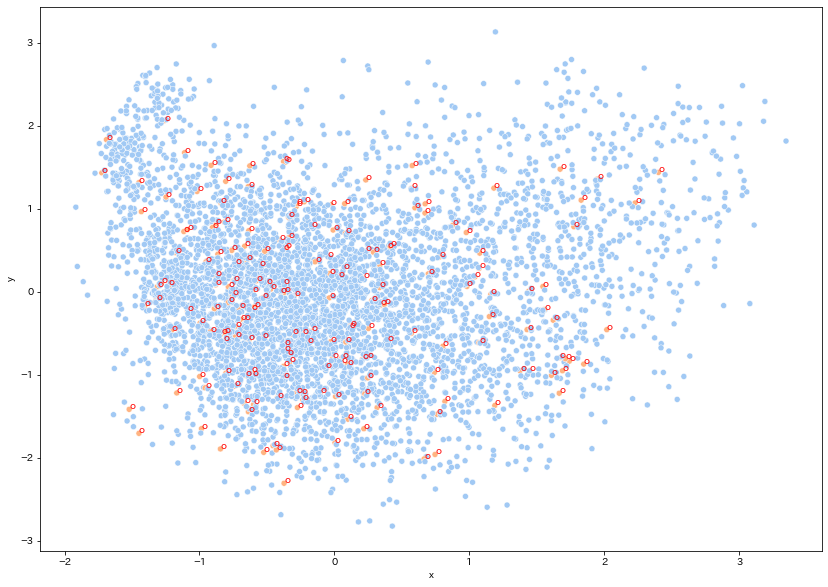

In [157]:
en_vectors = make_scatter(model_1, size, lang_1, df_dict_selected_for_3lang)

<ipython-input-154-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


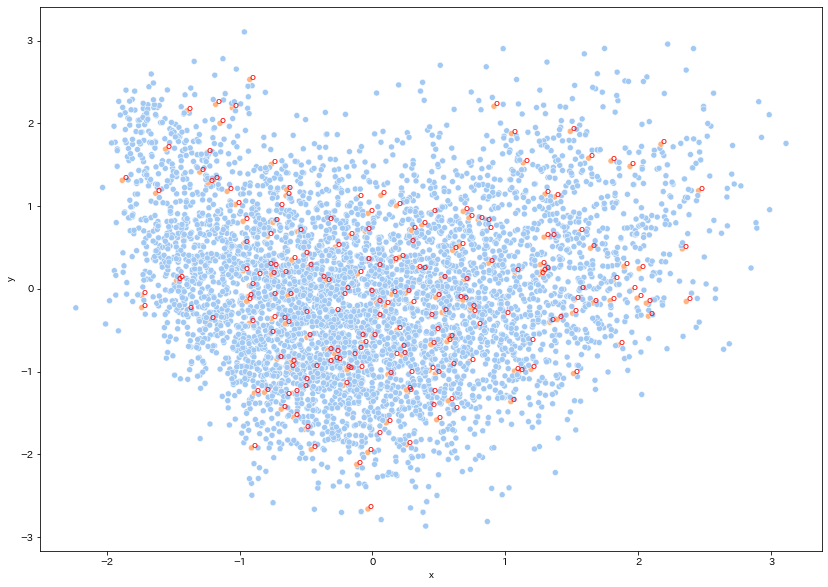

In [158]:
fr_vectors = make_scatter(model_2, size, lang_2, df_dict_selected_for_3lang)

<ipython-input-154-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


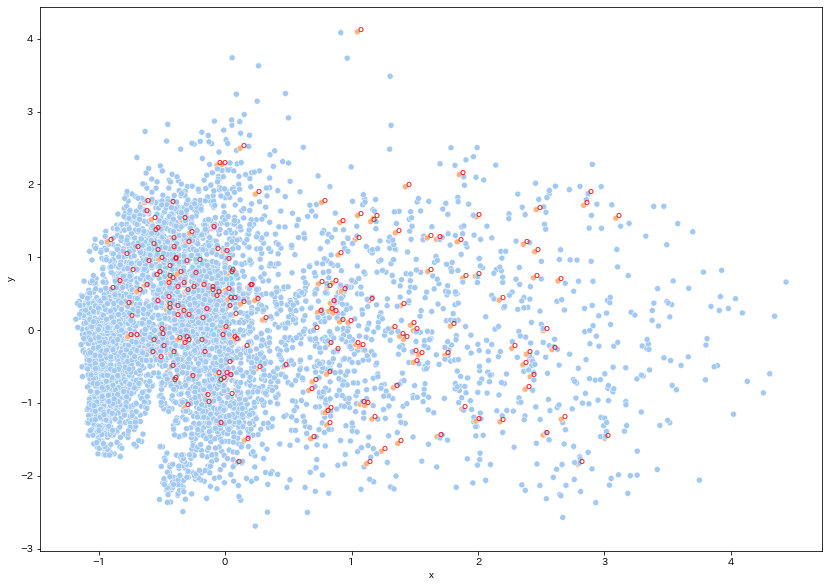

In [159]:
ja_vectors = make_scatter(model_3, size, lang_3, df_dict_selected_for_3lang)

get cross-lingual word embedding

In [17]:
import torch

In [51]:
def reload_best(path):
    # reload the model
    return torch.from_numpy(torch.load(path))

In [183]:
model_['鳥']

array([ 3.39157097e-02, -1.87223405e-01,  2.32565776e-02, -7.55659193e-02,
       -1.59885194e-02,  1.26807660e-01,  1.43799102e-02, -3.28651816e-02,
       -5.61243594e-02,  4.34435159e-02,  5.07009104e-02, -6.49866685e-02,
        2.87939347e-02,  3.09014935e-02, -2.94313394e-02,  2.94652469e-02,
        8.47808123e-02,  1.46481618e-01,  1.59466714e-02, -4.25465442e-02,
       -6.56530447e-03,  2.26983652e-02,  6.70078024e-02,  5.91197833e-02,
       -3.87176797e-02,  1.00911791e-02,  4.43090089e-02,  1.82845388e-02,
        1.18732907e-01,  1.26885643e-04, -6.30555004e-02,  3.94513533e-02,
        1.40919983e-01, -2.13653252e-01, -5.50300162e-03,  8.69764462e-02,
        5.50439693e-02, -9.34491679e-02, -3.79057229e-02,  6.22088909e-02,
       -9.94961038e-02, -6.99137151e-02, -8.93672556e-03,  8.85423794e-02,
        7.15018138e-02, -3.13073769e-02, -4.52828370e-02,  3.51935215e-02,
        2.28658901e-03,  5.75786680e-02,  1.98185891e-02, -8.30859691e-02,
       -5.47268707e-03, -

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


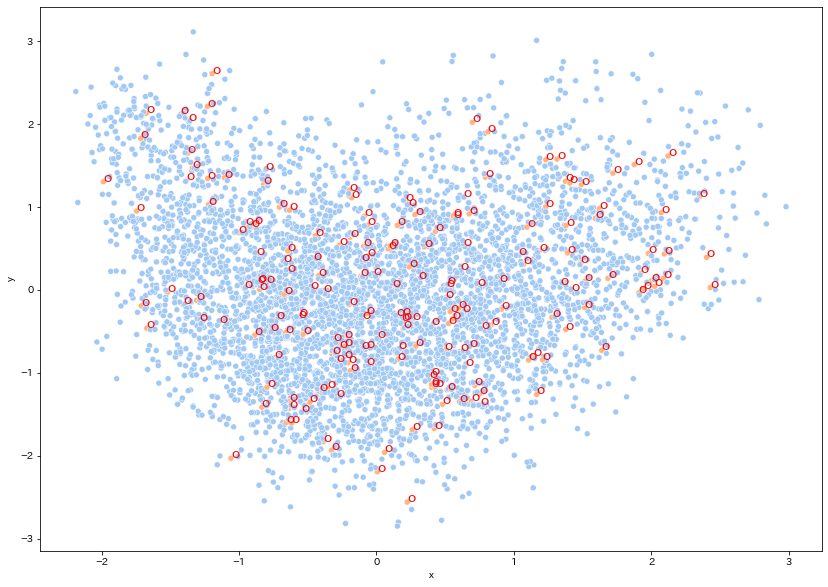

In [164]:
fromlang = 'fr'
tolang = 'ja'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(fr_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_2, size, lang_2, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


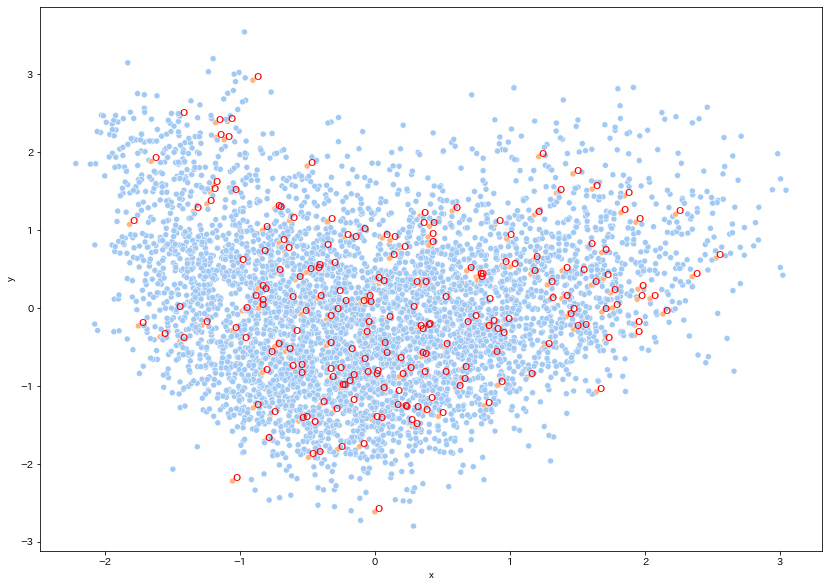

In [165]:
fromlang = 'fr'
tolang = 'en'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(fr_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_2, size, lang_2, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


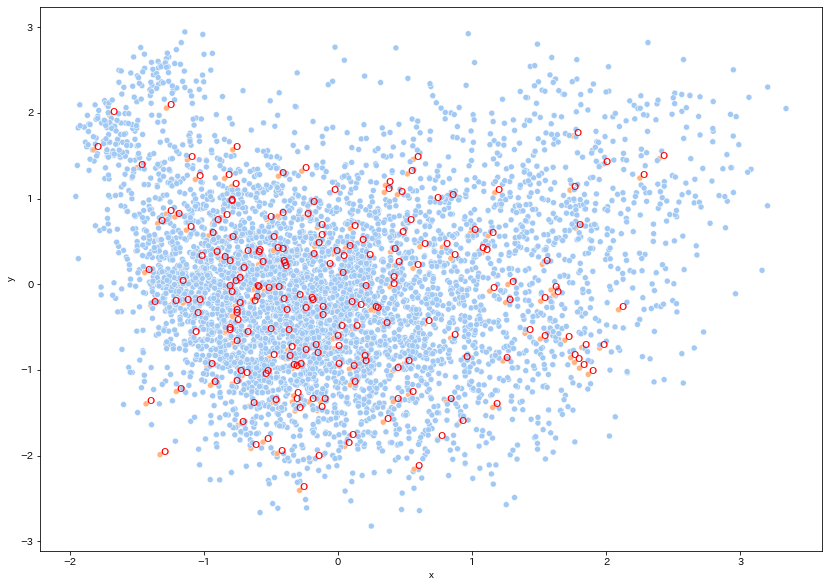

In [166]:
fromlang = 'en'
tolang = 'fr'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


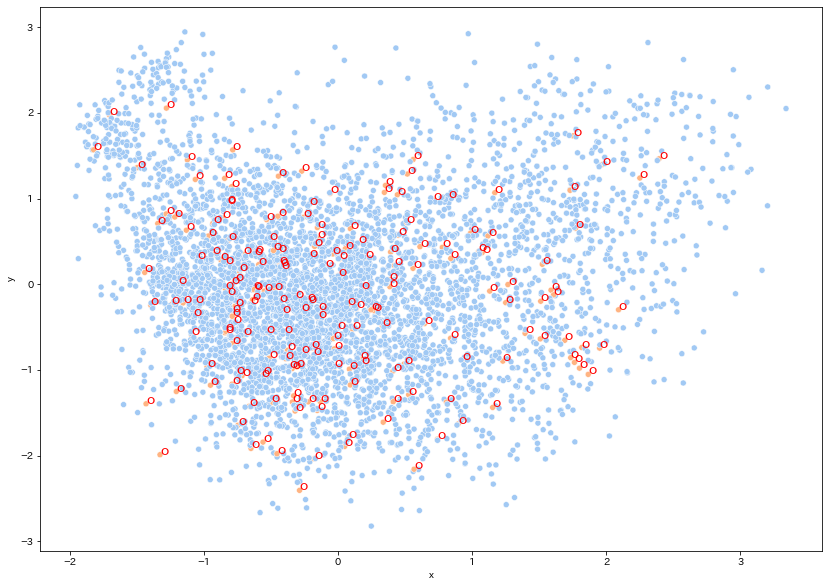

In [162]:
fromlang = 'en'
tolang = 'fr'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


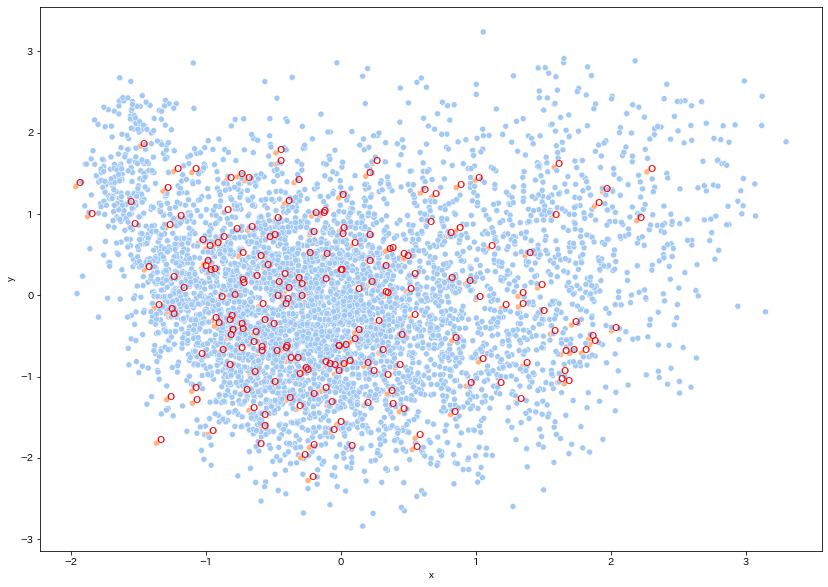

In [167]:
fromlang = 'en'
tolang = 'ja'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


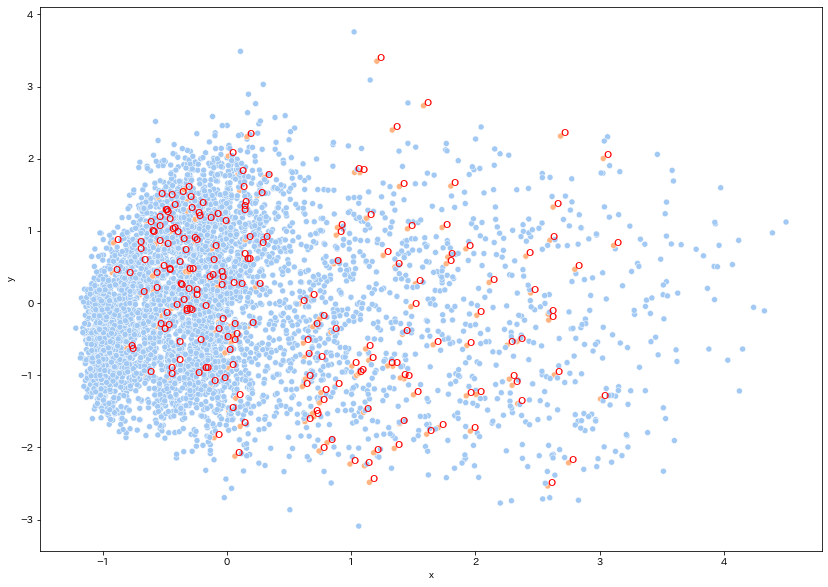

In [168]:
fromlang = 'ja'
tolang = 'en'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(ja_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_3, size, lang_3, df_dict_selected_for_3lang,mapped)

<ipython-input-154-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-154-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


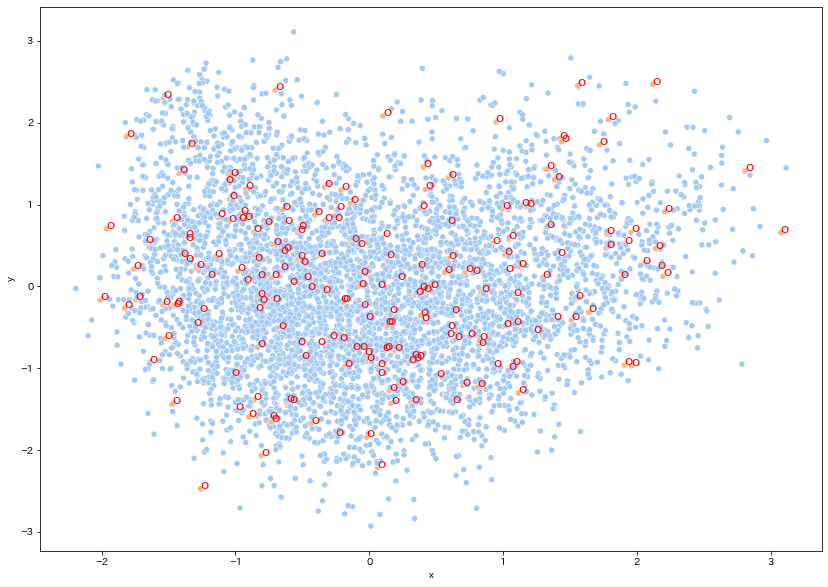

In [171]:
fromlang = 'fr'
tolang = 'en'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_1 = reload_best(path)
fromlang = 'en'
tolang = 'ja'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_2 = reload_best(path)
fromlang = 'fr'
tolang = 'ja'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_3 = reload_best(path)

emb = torch.from_numpy(fr_vectors)

temp = emb.mm(mapping_1)
temp_1 = temp.mm(mapping_2)

temp_2 = emb.mm(mapping_3)

temp = temp_1*0.25 + temp_2*0.75

mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-11-07e471eb7b02>:153: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-11-07e471eb7b02>:182: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=word, xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14)
<ipython-input-11-07e471eb7b02>:186: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(en_model.wv.vocab)
<ipython-input-11-07e471eb7b02>:209: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s=f'o', xy=(en_df_t.loc[i,'x'], en_df_t.loc[i,'y']), fontsize=8, c='r')


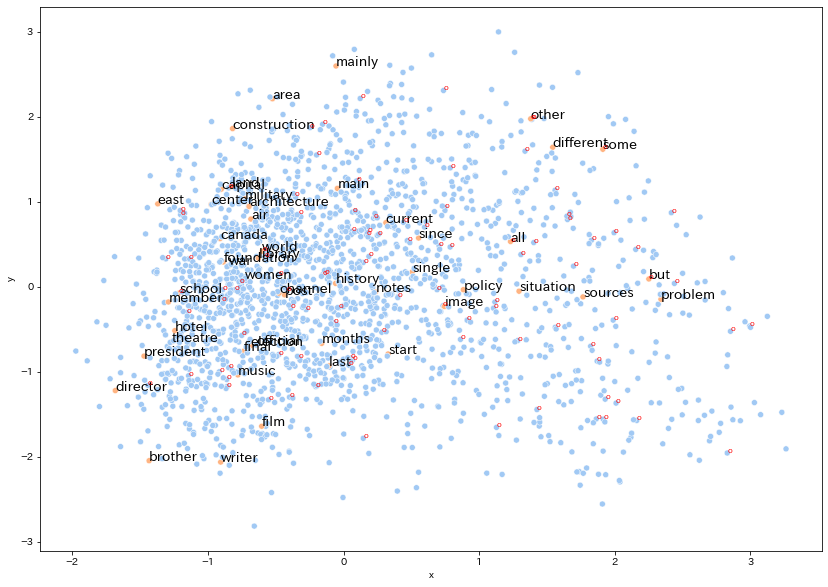

In [22]:
fromlang = 'ja'
tolang = 'fr'
path = f'debug_file/debug/N_fast_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(ja_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_3, size, lang_3, df_dict_selected_for_3lang,mapped)

Wiki2vec

In [132]:
fastvec_wj = KeyedVectors.load_word2vec_format("data/fasttext-vectors/jawiki_300d.txt", limit=5000)
fastvec_wf = KeyedVectors.load_word2vec_format("data/fasttext-vectors/frwiki_300d.txt", limit=5000)
fastvec_we = KeyedVectors.load_word2vec_format("data/fasttext-vectors/enwiki_300d.txt", limit=5000)

In [133]:
size = 5000
model_1 = fastvec_we
lang_1 = 'en'

model_2 = fastvec_wf
lang_2 = 'fr'

model_3 = fastvec_wj
lang_3 = 'ja'

dict_3 = pd.read_csv('data/crosslingual/dictionaries/en_fr_ja.txt',sep='\t')

lang1 = fastvec_we
lang2 = fastvec_wf
lang3 = fastvec_wj

In [135]:
df_dict_selected_for_3lang = make_df_dict_selected_for_3lang(dict_3,'en','fr','ja',200)

2501


<ipython-input-134-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


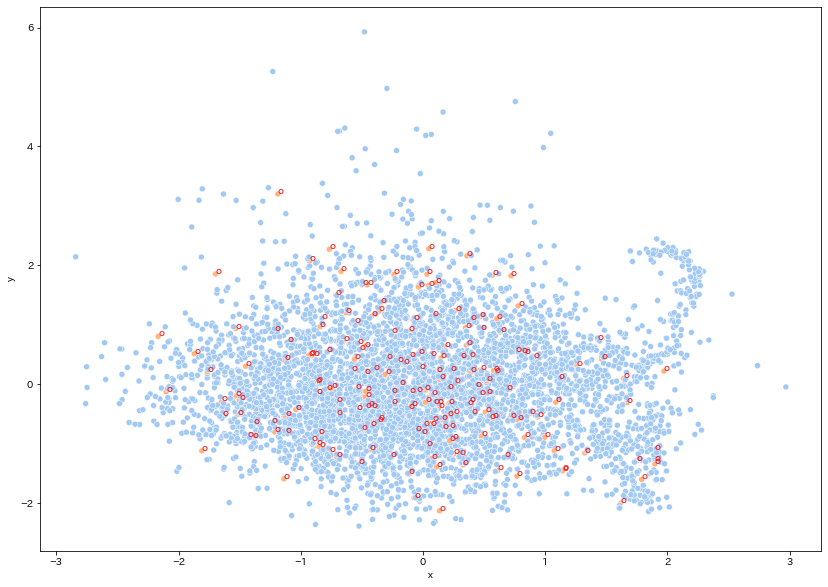

In [136]:
en_vectors = make_scatter(model_1, size, lang_1, df_dict_selected_for_3lang)

<ipython-input-134-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


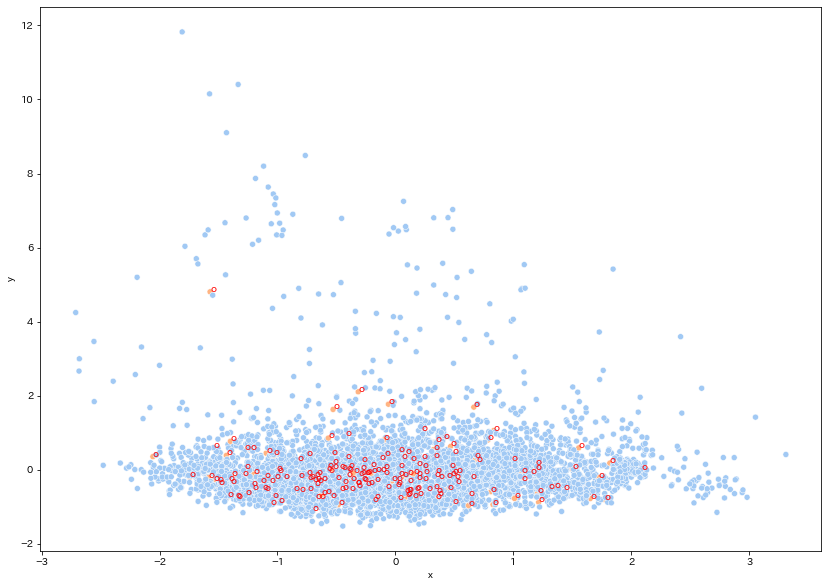

In [137]:
fr_vectors = make_scatter(model_2, size, lang_2, df_dict_selected_for_3lang)

<ipython-input-134-1045ad69fd2d>:23: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:52: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=10,c='r')


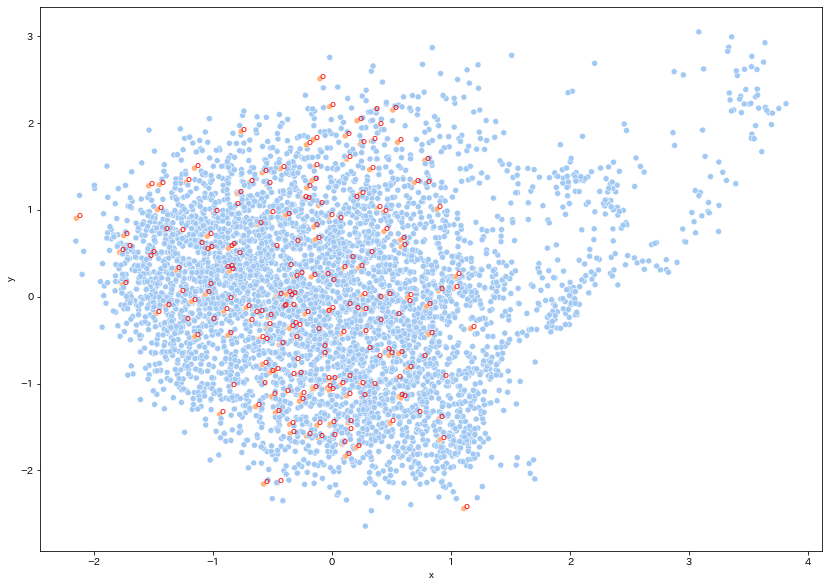

In [138]:
ja_vectors = make_scatter(model_3, size, lang_3, df_dict_selected_for_3lang)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


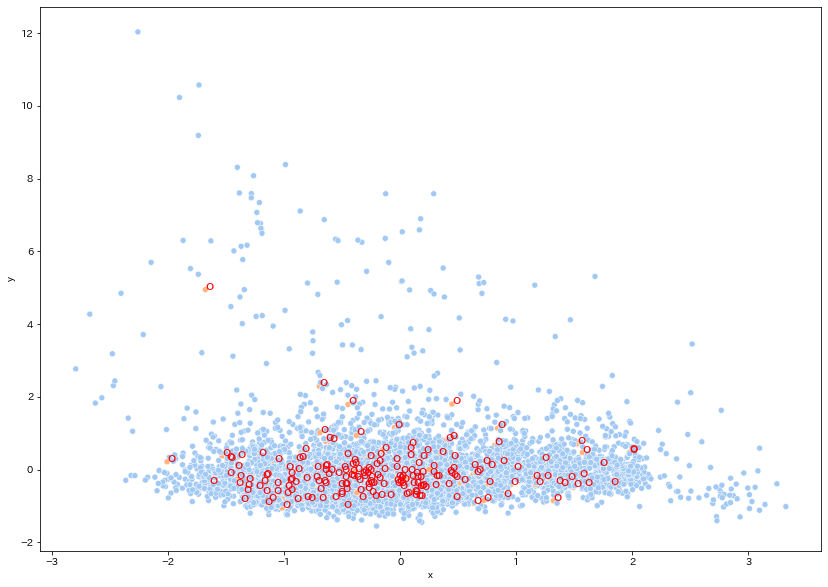

In [139]:
fromlang = 'fr'
tolang = 'en'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(fr_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_2, size, lang_2, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


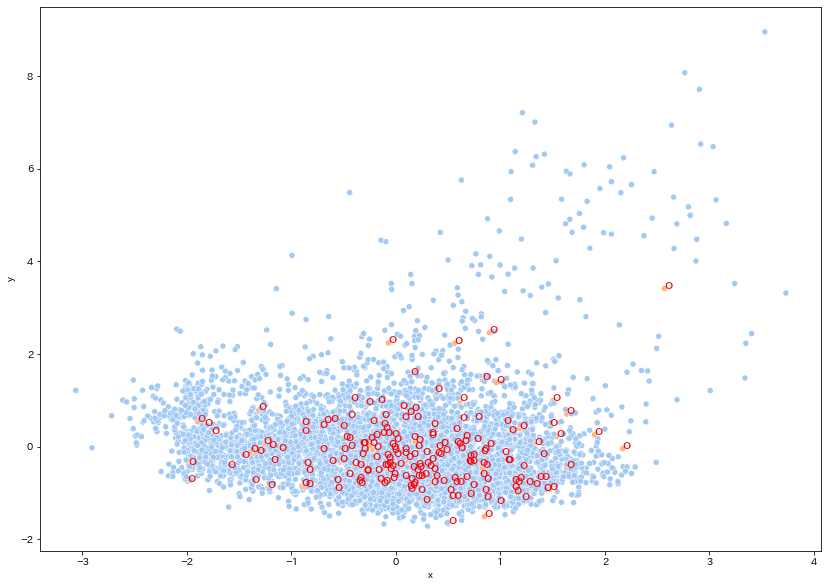

In [140]:
fromlang = 'fr'
tolang = 'ja'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(fr_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_2, size, lang_2, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


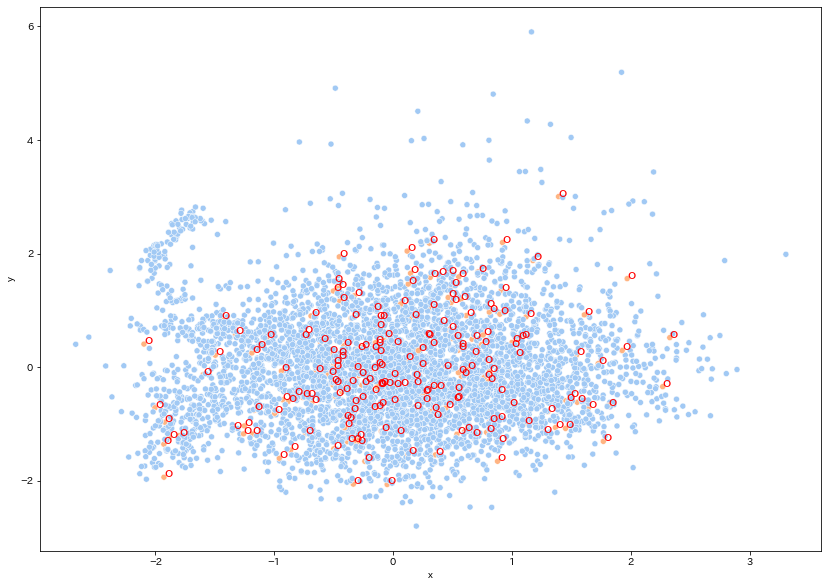

In [141]:
fromlang = 'en'
tolang = 'fr'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


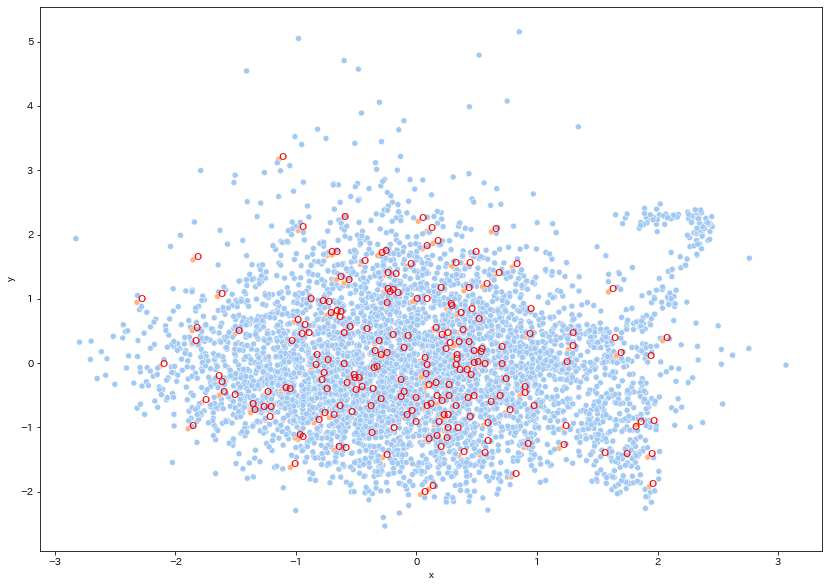

In [142]:
fromlang = 'en'
tolang = 'ja'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


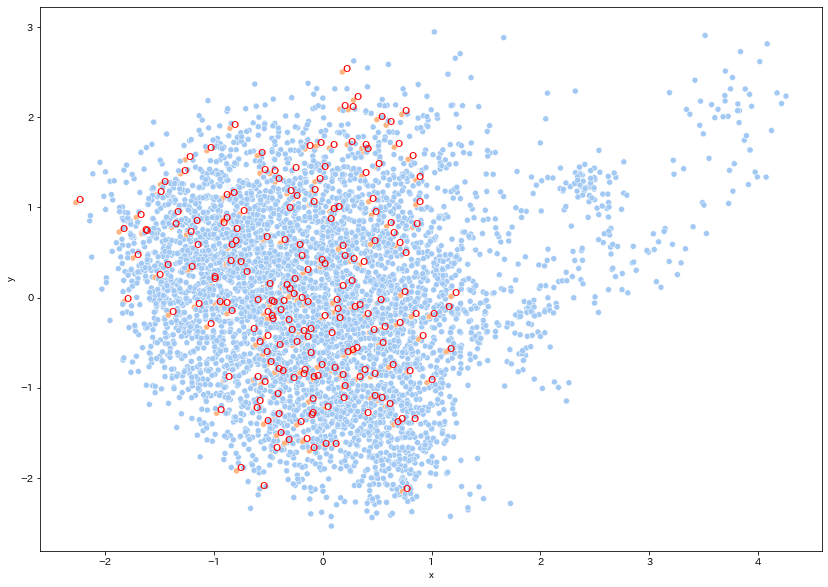

In [144]:
fromlang = 'ja'
tolang = 'fr'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(ja_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_3, size, lang_3, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


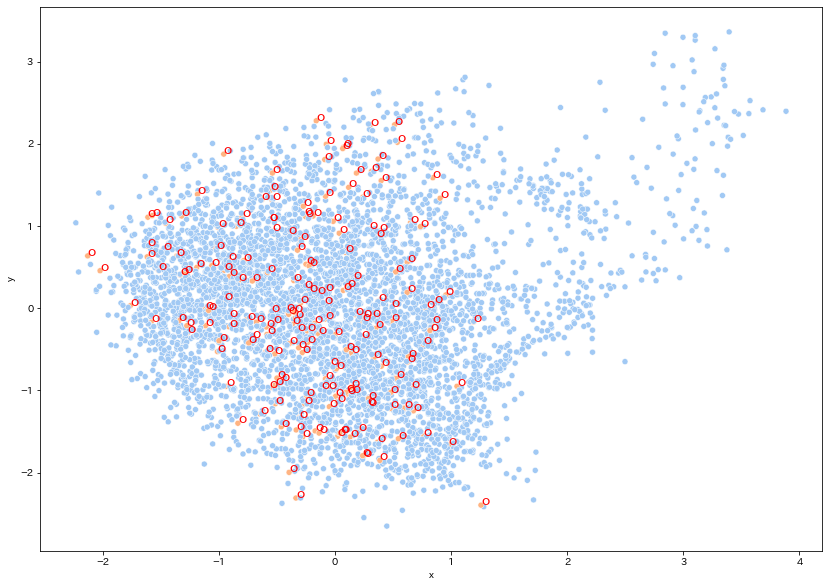

In [145]:
fromlang = 'ja'
tolang = 'en'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping = reload_best(path)

emb = torch.from_numpy(ja_vectors)

temp = emb.mm(mapping)
mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_3, size, lang_3, df_dict_selected_for_3lang,mapped)

<ipython-input-134-1045ad69fd2d>:160: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  voca = list(model.wv.vocab)
<ipython-input-134-1045ad69fd2d>:189: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='o', xy=(df_t.loc[i,'x'], df_t.loc[i,'y']), fontsize=14, c='r')


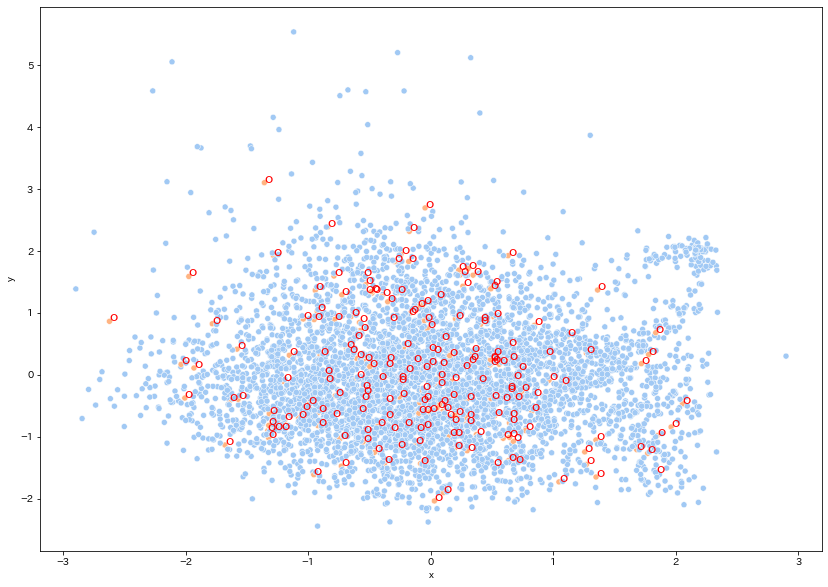

In [151]:
fromlang = 'en'
tolang = 'fr'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_1 = reload_best(path)
fromlang = 'fr'
tolang = 'ja'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_2 = reload_best(path)
fromlang = 'en'
tolang = 'ja'
path = f'debug_file/debug/Wiki_identical_fr_en_JA/best_mapping_{fromlang}2{tolang}.t7'
mapping_3 = reload_best(path)

emb = torch.from_numpy(en_vectors)

temp = emb.mm(mapping_1)
temp_1 = temp.mm(mapping_2)

temp_2 = emb.mm(mapping_3)

temp = temp_1*0.25 + temp_2*0.75

mapped = temp.to('cpu').detach().numpy().copy()

make_mapped_scatter(model_1, size, lang_1, df_dict_selected_for_3lang,mapped)